In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#path of raw data
cab_data = pd.read_csv("D:\AM\Week 2\DataSets-main\Cab_Data.csv") 
#path of feature specific files for individual paticipant combined with timestamp for each data 
city_data= pd.read_csv("D:\AM\Week 2\DataSets-main\City.csv")  
#path of data of individual paticipant with features joined on Timestamp
customer_id = pd.read_csv("D:\AM\Week 2\DataSets-main\Customer_ID.csv")
#path of data of individual paticipant with features joined on Timestamp
trans_id = pd.read_csv("D:\AM\Week 2\DataSets-main\Transaction_ID.csv")  

In [3]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [4]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [5]:
customer_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
trans_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


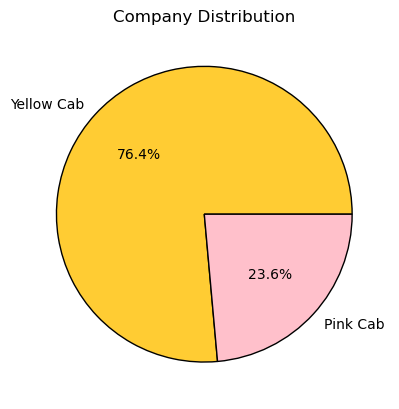

In [7]:
company_counts = cab_data['Company'].value_counts()

# Create a pie chart
colors = ['#FFCC33', 'pink', 'blue']
plt.pie(company_counts.values, labels=company_counts.index,colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%')
plt.title('Company Distribution')
plt.show()

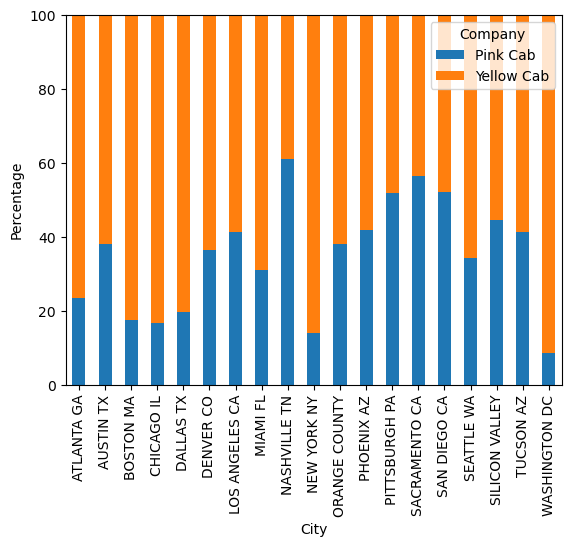

In [8]:
# group the data by City and Company
grouped = cab_data.groupby(["City", "Company"])

# calculate the percentage of each company in each city
totals = grouped.size().groupby(level=0).apply(lambda x: 100 * x / x.sum())

# create a pivot table to reshape the data for plotting
pivot = pd.pivot_table(totals.reset_index(), values=0, index="City", columns="Company")

# create a grouped bar chart
ax = pivot.plot(kind="bar", stacked=True, ylim=(0, 100))
ax.set_ylabel("Percentage")
plt.show()

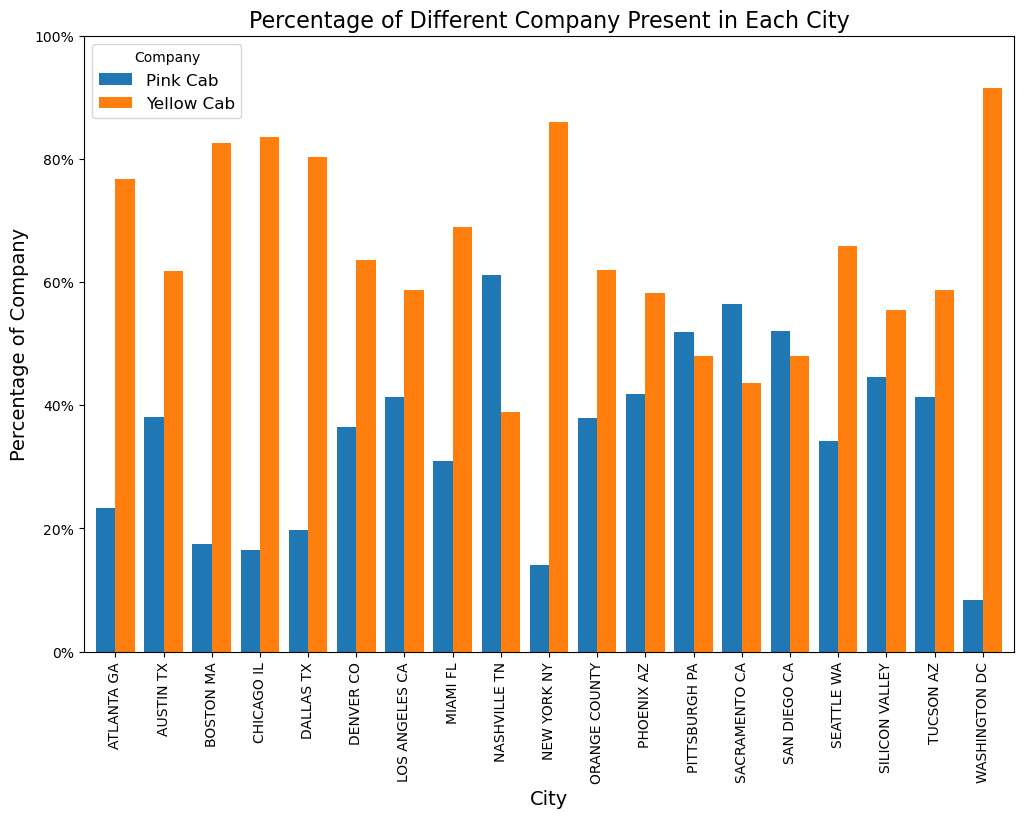

In [9]:
# Group the data by city and company, and calculate the percentage of each company in each city
grouped = cab_data.groupby(["City", "Company"])["Transaction ID"].count().reset_index()
grouped["Percentage"] = grouped.groupby("City")["Transaction ID"].apply(lambda x: 100 * x / x.sum())

# Plot the data as a bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped.pivot("City", "Company", "Percentage").plot(kind="bar", ax=ax, width=0.8)

# Set the chart properties
ax.set_xlabel("City", fontsize=14)
ax.set_ylabel("Percentage of Company", fontsize=14)
ax.set_title("Percentage of Different Company Present in Each City", fontsize=16)
ax.legend(title="Company", fontsize=12)
ax.set_ylim([0, 100])
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.show()

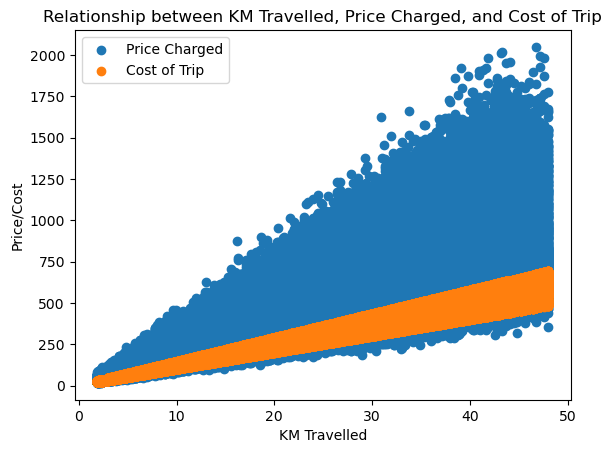

In [10]:
plt.scatter(cab_data['KM Travelled'], cab_data['Price Charged'], label='Price Charged')
plt.scatter(cab_data['KM Travelled'], cab_data['Cost of Trip'], label='Cost of Trip')

# Set the plot title and axis labels
plt.title('Relationship between KM Travelled, Price Charged, and Cost of Trip')
plt.xlabel('KM Travelled')
plt.ylabel('Price/Cost')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

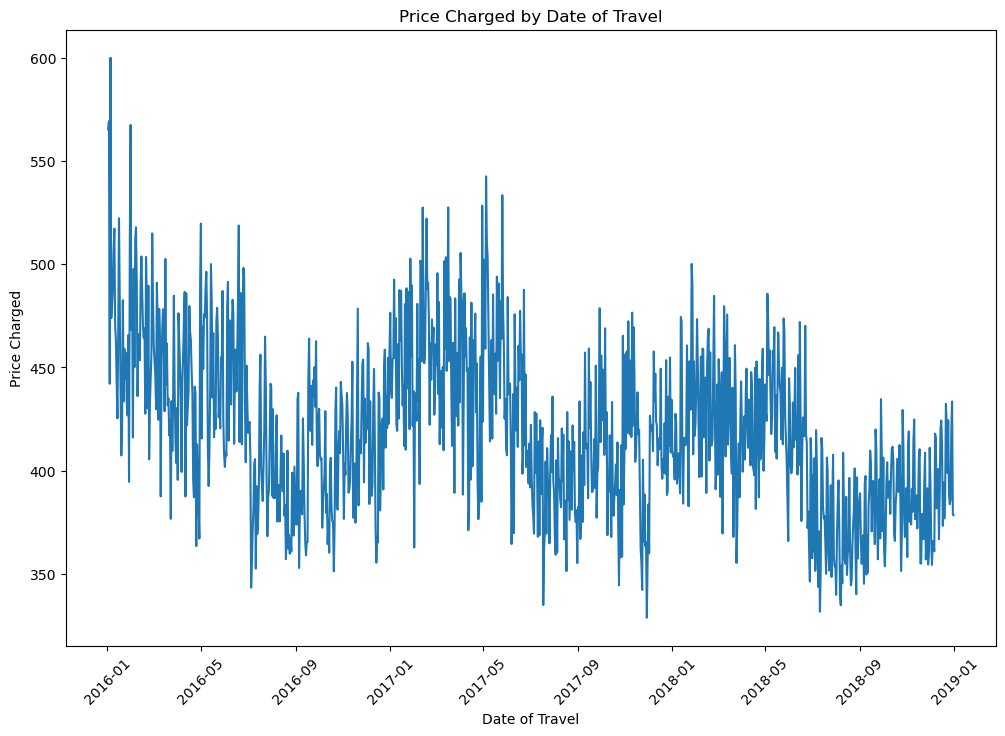

In [12]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format='%d/%m/%Y')

# Group the data by date and calculate the mean price charged
grouped = cab_data.groupby('Date of Travel')['Price Charged'].mean()
fig, ax = plt.subplots(figsize=(12, 8))
# Create a line graph
plt.plot(grouped.index, grouped.values)

# Set the plot title and axis labels
plt.title('Price Charged by Date of Travel')
plt.xlabel('Date of Travel')
plt.ylabel('Price Charged')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

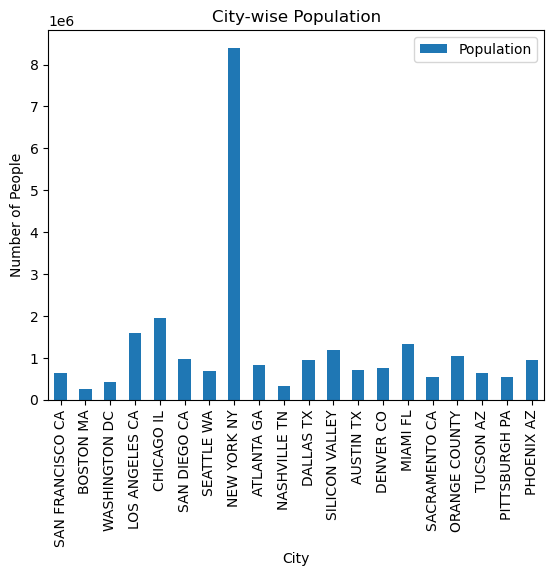

In [29]:
city_data['Population'] = city_data['Population'].astype(str).str.replace(',', '')
city_data['Users'] = city_data['Users'].astype(str).str.replace(',', '')
city_data['Population'] = pd.to_numeric(city_data['Population'])
city_data['Users'] = pd.to_numeric(city_data['Users'])

# Create a bar plot
city_data.plot(x='City', y=['Population'], kind='bar')

# Set the plot title and axis labels
plt.title('City-wise Population')
plt.xlabel('City')
plt.ylabel('Number of People')

# Display the plot
plt.show()

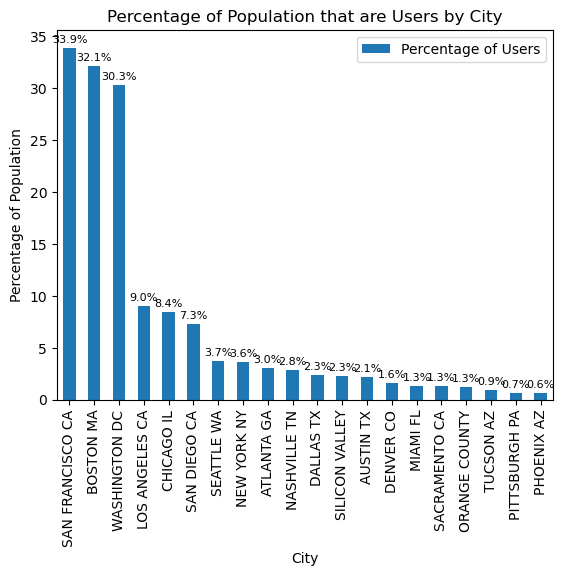

In [13]:
city_data['Percentage of Users'] = city_data['Users'] / city_data['Population'] * 100
city_data = city_data.sort_values('Percentage of Users', ascending=False)

# Create a bar plot of the percentage of users by city
ax=city_data.plot(x='City', y='Percentage of Users', kind='bar')
# Set the plot title and axis labels
plt.title('Percentage of Population that are Users by City')
plt.xlabel('City')
plt.ylabel('Percentage of Population')

for i, v in enumerate(city_data['Percentage of Users']):
    ax.text(i, v+0.5, '{:.1f}%'.format(v), ha='center', fontsize=8)

# Display the plot
plt.show()

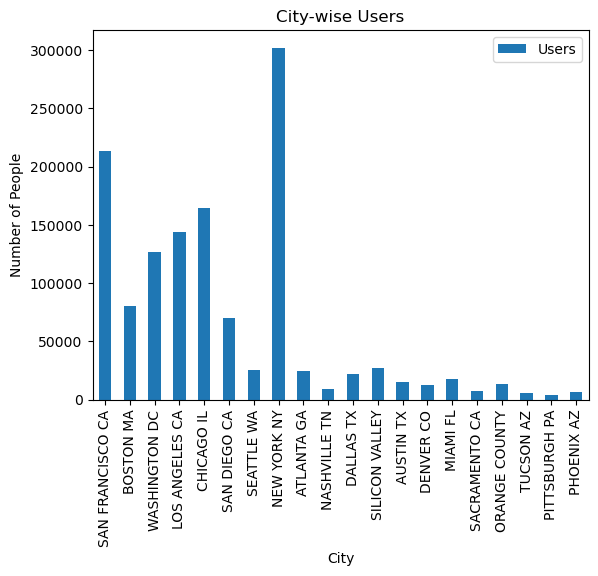

In [14]:
city_data.plot(x='City', y=['Users'], kind='bar')

# Set the plot title and axis labels
plt.title('City-wise Users')
plt.xlabel('City')
plt.ylabel('Number of People')

# Display the plot
plt.show()

Percentage of Male Customers: 54.02%
Percentage of Female Customers: 45.98%


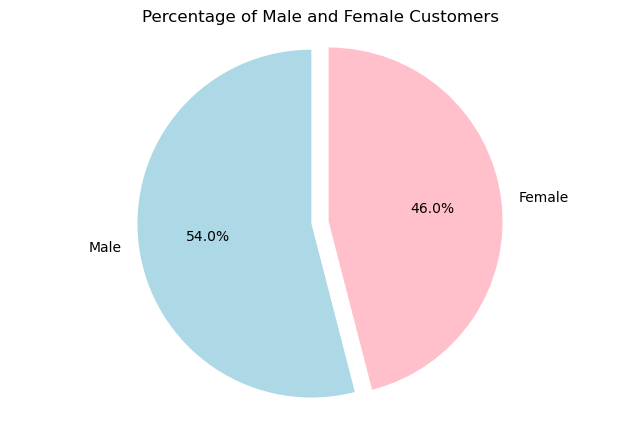

In [15]:
# Count the number of occurrences of each gender
gender_counts = customer_id['Gender'].value_counts()

# Calculate the percentage of male and female customers
male_percent = gender_counts['Male'] / len(customer_id) * 100
female_percent = gender_counts['Female'] / len(customer_id) * 100

# Print the percentage of male and female customers
print(f"Percentage of Male Customers: {male_percent:.2f}%")
print(f"Percentage of Female Customers: {female_percent:.2f}%")

# Plot a pie chart of the percentage of male and female customers
labels = ['Male', 'Female']
sizes = [male_percent, female_percent]
colors = ['lightblue', 'pink']
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Male and Female Customers')

plt.show()

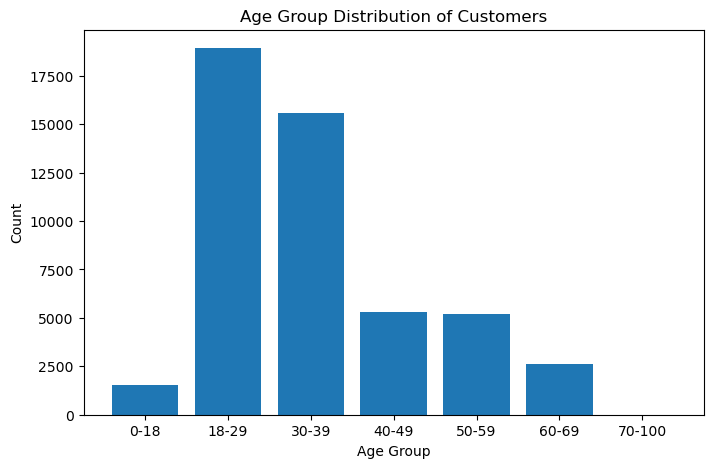

In [16]:
# Create age groups using the cut() method
bins = [0, 18, 30, 40, 50, 60, 70,100]
labels = ['0-18','18-29', '30-39', '40-49', '50-59', '60-69', '70-100']
customer_id['Age Group'] = pd.cut(customer_id['Age'], bins=bins, labels=labels)

# Count the number of occurrences in each age group
age_group_counts = customer_id['Age Group'].value_counts()

# Plot a bar chart of the age group distribution
age_df = pd.DataFrame({'Age Group': age_group_counts.index, 'Count': age_group_counts.values})

# Sort the dataframe based on the age group labels
age_df = age_df.sort_values(by='Age Group')

# Plot a bar chart of the age group distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(age_df['Age Group'], age_df['Count'])

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution of Customers')

plt.show()

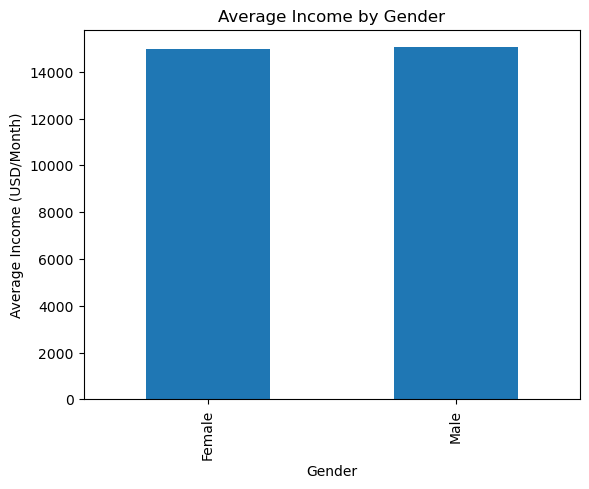

In [17]:
income_by_gender = customer_id.groupby('Gender')['Income (USD/Month)'].mean()

# Create a bar plot of average income by gender
income_by_gender.plot(kind='bar')

# Set the axis labels and title
plt.xlabel('Gender')
plt.ylabel('Average Income (USD/Month)')
plt.title('Average Income by Gender')

# Show the plot
plt.show()

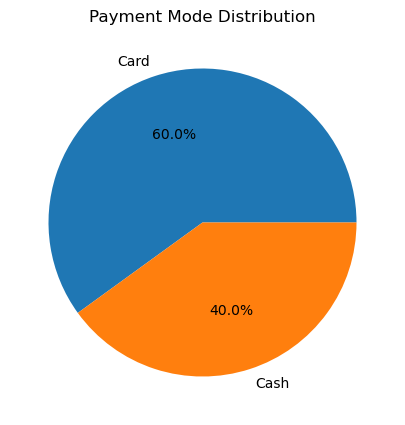

In [18]:
# Count the number of occurrences of each payment mode
payment_mode_counts = trans_id['Payment_Mode'].value_counts()

# Create a pie chart of the payment mode distribution
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(payment_mode_counts.values, labels=payment_mode_counts.index, autopct='%1.1f%%')

plt.title('Payment Mode Distribution')

plt.show()


In [19]:
cust_trans = pd.merge(trans_id, customer_id, on='Customer ID', how='inner')

# Print the merged dataframe 
cust_trans.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      440098 non-null  int64   
 1   Customer ID         440098 non-null  int64   
 2   Payment_Mode        440098 non-null  object  
 3   Gender              440098 non-null  object  
 4   Age                 440098 non-null  int64   
 5   Income (USD/Month)  440098 non-null  int64   
 6   Age Group           440098 non-null  category
dtypes: category(1), int64(4), object(2)
memory usage: 23.9+ MB


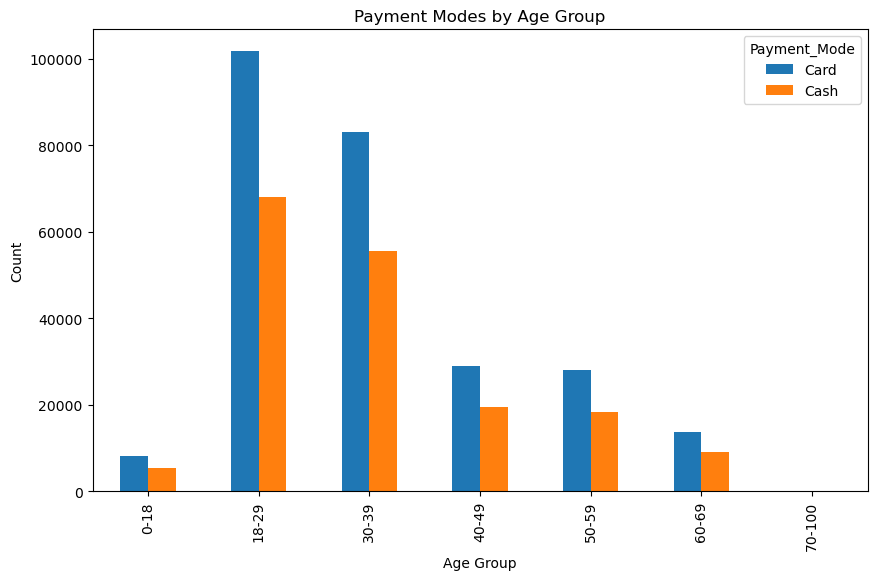

In [20]:
# Create age groups using the cut() method
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['0-18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-100']
cust_trans['Age Group'] = pd.cut(cust_trans['Age'], bins=bins, labels=labels)

# Create a pivot table to count the number of occurrences of each payment mode for each age group
age_payment_pivot = pd.pivot_table(cust_trans, values='Transaction ID', index='Age Group', columns='Payment_Mode', aggfunc='count')

# Plot the grouped bar chart
age_payment_pivot.plot(kind='bar', stacked=False, figsize=(10,6))

# Set the chart labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Payment Modes by Age Group')

# Show the chart
plt.show()


In [21]:
df1 = pd.merge(trans_id, customer_id, on='Customer ID', how='inner')
df2 = pd.merge(df1, cab_data, on='Transaction ID', how='inner') 
df = pd.merge(df2, city_data, on='City', how='inner') 
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Age Group,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Percentage of Users
0,10000011,29290,Card,Male,28,10813,18-29,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,3.031225
1,10351127,29290,Cash,Male,28,10813,18-29,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,3.031225
2,10412921,29290,Card,Male,28,10813,18-29,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,3.031225
3,10000012,27703,Card,Male,27,9237,18-29,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,3.031225
4,10320494,27703,Card,Male,27,9237,18-29,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,Female,29,6829,18-29,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,418859,127001,30.320705
359388,10319775,51406,Cash,Female,29,6829,18-29,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,418859,127001,30.320705
359389,10347676,51406,Card,Female,29,6829,18-29,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,418859,127001,30.320705
359390,10358624,51406,Cash,Female,29,6829,18-29,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,418859,127001,30.320705


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Transaction ID       359392 non-null  int64   
 1   Customer ID          359392 non-null  int64   
 2   Payment_Mode         359392 non-null  object  
 3   Gender               359392 non-null  object  
 4   Age                  359392 non-null  int64   
 5   Income (USD/Month)   359392 non-null  int64   
 6   Age Group            359392 non-null  category
 7   Date of Travel       359392 non-null  int64   
 8   Company              359392 non-null  object  
 9   City                 359392 non-null  object  
 10  KM Travelled         359392 non-null  float64 
 11  Price Charged        359392 non-null  float64 
 12  Cost of Trip         359392 non-null  float64 
 13  Population           359392 non-null  int64   
 14  Users                359392 non-null  int64   
 15  

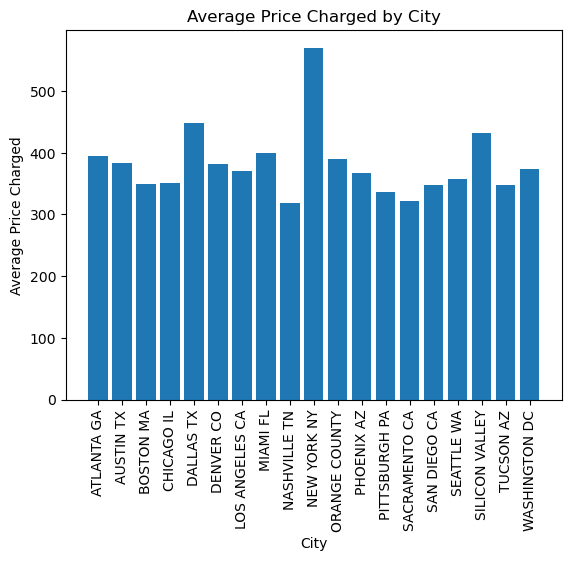

In [23]:
avg_price_by_city = df.groupby('City')['Price Charged'].mean()

# Create a bar plot of the average price charged in each city
plt.bar(avg_price_by_city.index, avg_price_by_city.values)
plt.xlabel('City')
plt.ylabel('Average Price Charged')
plt.title('Average Price Charged by City')
plt.xticks(rotation=90)
plt.show()

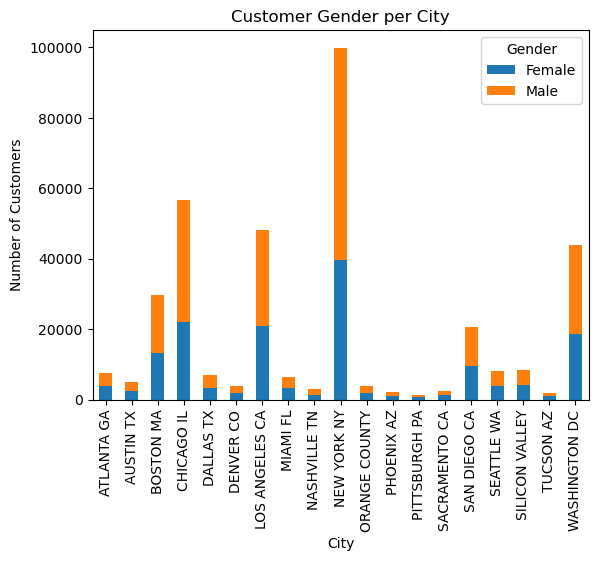

In [24]:
city_gender = df.groupby(['City', 'Gender']).size().unstack()

# Create a stacked bar plot
city_gender.plot(kind='bar', stacked=True)

# Set the title and axes labels
plt.title('Customer Gender per City')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

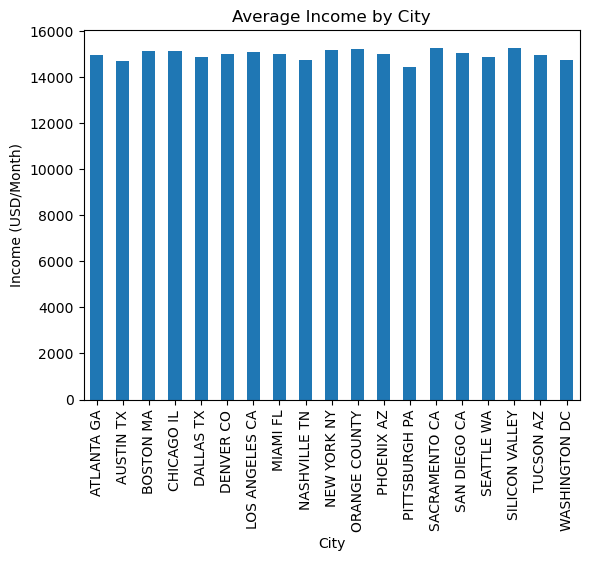

In [25]:
income_by_city = df.groupby('City')['Income (USD/Month)'].mean()

# Create a bar plot of the average income per city
income_by_city.plot(kind='bar')

# Set the title and axis labels
plt.title('Average Income by City')
plt.xlabel('City')
plt.ylabel('Income (USD/Month)')

# Display the plot
plt.show()


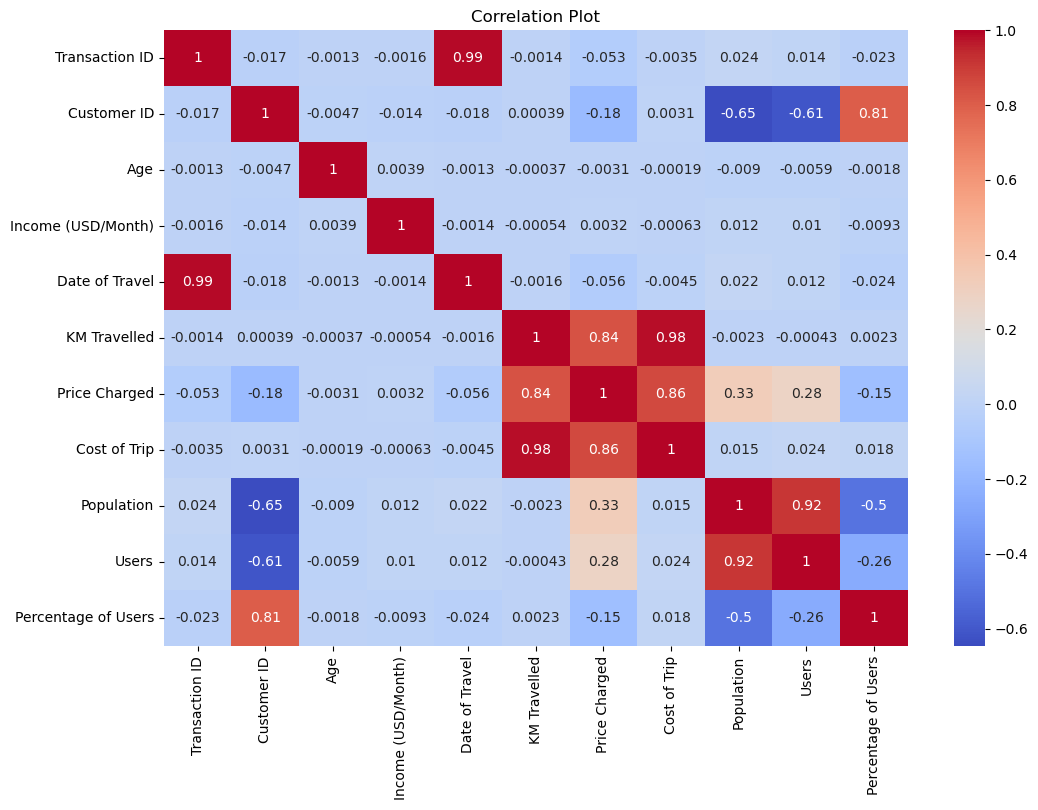

In [26]:
corr_matrix = df.corr()

# Create heatmap of correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
# Create the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()